In [71]:
import tensorflow as tf 
print(tf.__version__)

2.9.2


## Introduction to Neural Networks Classification with tensorflow 
A classification problem involves predicting whether something is one thing or another.
A few types of Classification problems
1. binary classification
2. multi class classification 
3. multi label classification

## Creating data to view

In [72]:
from sklearn.datasets import make_circles

# Make 1000 examples 
n_samples = 1000 

# create circles 
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [73]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [74]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Let's visualize the data

In [75]:
import pandas as pd 
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


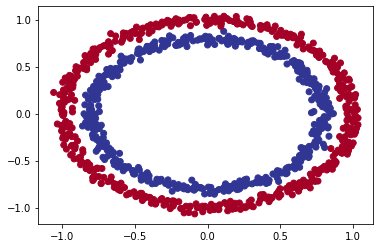

In [76]:
import matplotlib.pyplot as plt 
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [77]:
# shape
X.shape, y.shape

((1000, 2), (1000,))

In [78]:
# samples number 
len(X), len(y)

(1000, 1000)

### Build a Neural Network

In [79]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.SGD(), 
                metrics = ['accuracy'])

# 3. Fit the model 
model_1.fit(tf.expand_dims(X, axis = -1), y, epochs = 5) 

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 2.7406 - accuracy: 0.4925
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 0.7410 - accuracy: 0.4992
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7079 - accuracy: 0.4961
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6980 - accuracy: 0.4986
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.5012


- The model is only 50% accurate, it seems the model is just guessing. 
Let's improve it by training it for longer

In [80]:
# 3. Fit the model 
model_1.fit(tf.expand_dims(X, axis = -1), y, epochs = 200) 
model_1.evaluate(X, y)

Epoch 1/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.4928
Epoch 2/200
32/32 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.4956
Epoch 3/200
32/32 [==============================] - 0s 9ms/step - loss: 0.6941 - accuracy: 0.4854
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.4732
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4888
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5085
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4703
Epoch 9/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.4895
Epoch 10/200
32/32 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.4989
Epoch 11/

[0.693464994430542, 0.5]

No improvement, let's add another layer

In [81]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1), 
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.SGD(), 
                metrics = ['accuracy'])

# 3. Fit the model 
model_2.fit(tf.expand_dims(X, axis = -1), y, epochs = 100) 

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 1.4570 - accuracy: 0.4897
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7292 - accuracy: 0.4994
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7172 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7091 - accuracy: 0.4989
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7046 - accuracy: 0.5019
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 0.7017 - accuracy: 0.4997
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7005 - accuracy: 0.4985
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6992 - accuracy: 0.4979
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6977 - accuracy: 0.4979
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6963 - accuracy: 0.5020
Epoch 11/

In [82]:
# Evaluate the model 
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933176517486572, 0.5]

### Improving our model

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. Fit the model 
model_3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100) 

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 2.3571 - accuracy: 0.4968
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7097 - accuracy: 0.4915
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5044
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.4928
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4865
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.5131
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6955 - accuracy: 0.4978
Epoch 8/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6940 - accuracy: 0.4926
Epoch 9/100
32/32 [==============================] - 0s 12ms/step - loss: 0.6938 - accuracy: 0.5023
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5090
Epoch 1

In [ ]:
model_3.summary()

## Let's visualize our model

In [ ]:
import numpy as np 
def plot_decision_boundary(model, X, y): 
  """
  plots the decision boundary created by a model predictiong on X.
  """
  # define the axis boundaries of the plot and create a meshgrid 
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  # create X value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class 
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # we have to reshape our prediction tto get them ready for plotting 
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else: 
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundaryv
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max()) 

In [ ]:
# check out the prediction our model is making 
plot_decision_boundary(model_3, X = X, y = y)

## The Missing Piece: Non - linearity

## Let's build our first Neural network with non - linear activation function

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu), # non linear activation function
    
])

# 2. Compile the model 
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001), 
                metrics = ['accuracy'])

# 3. Fit the model 
model_4.fit(tf.expand_dims(X, axis = -1), y, epochs = 100) 

### Let's build another non linear model

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model 
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001), 
                metrics = ['accuracy'])

# 3. Fit the model 
model_5.fit(X, y, epochs = 100)
# model_5.fit(tf.expand_dims(X, axis = 1), y, epochs = 100) 
# model.fit(tf.expand_dims(X, axis=-1),y,epochs=10)

In [ ]:
plot_decision_boundary(model_5, X, y)

**Note:** The combination of **linear (straight lines)** and **non-linear (non-straight lines)** functions is one of the key fundamentals of neural networks.

## Split the data into train and test set

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model 
model_6.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(lr = 0.01), # increase the learning rate
                metrics = ['accuracy'])

# 3. Fit the model 
history = model_6.fit(X_train, y_train, epochs = 25)


In [ ]:
# evaluate the model on the test set
model_6.evaluate(X_test, y_test)

- Got a 100% accuracy

In [ ]:
# plot the decision boundaries for the training and tensorflow
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_6, X_test, y_test)
plt.show()

### Plot the loss (or training) curve

In [ ]:
history.history

In [ ]:
# let's convert it to a dataframe 
pd.DataFrame(history.history)

In [ ]:
# plot 
pd.DataFrame(history.history).plot()
plt.title('model_6 loass and accuracy curve')

- **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate 
To find the ideal learning rate (the learning rate where the loss decreases the most during training. 
  - A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model while it's training
  - Anothe model (we could use the same one as above, but we are practicing building model here)
  - A modified loss curve plot.

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model (same as model_6)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model 
model_7.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(lr = 0.01), 
                metrics = ['accuracy']) 

# 3. create a learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (pass lr_scheduler callback)
history_7 = model_7.fit(X_train, y_train, epochs = 100, 
                      callbacks = [lr_scheduler])


In [ ]:
# check out the history 
pd.DataFrame(history_7.history).plot(figsize = (10, 7), xlabel = 'epochs')

In [99]:
# plot the learning rate vs the loss 
lrs = 1e-4 * 10**(tf.range(100)/20) 
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

- these are the learning rate our model tried out

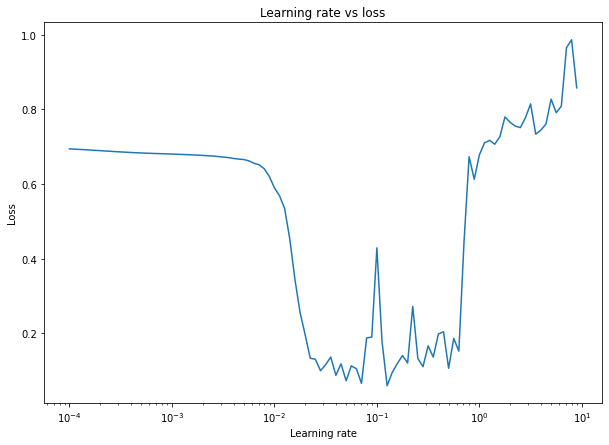

In [100]:
# plot the learning rate vs the loss 
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_7.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')
plt.show()

- The ideal learning rate here is somewhere around 0.01 to 0.02

# Fit a new model with the ideal learning rate 


In [101]:
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. compile the model 
model_8.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(lr = 0.02), 
                metrics = ['accuracy'])

# 3. fit the model 
history_8 = model_8.fit(X_train, y_train, epochs = 20 )

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

- model_8 has performed better by adjusting the learning rate of the optimizer

In [102]:
# evaluate model_8 on the test data 
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401832193136215, 0.9900000095367432]

- but it didn't generalized well on unseen data as the previous model

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


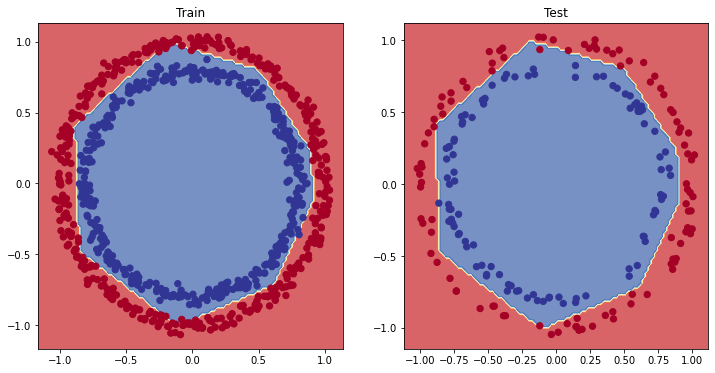

In [103]:
# plot the decision boundaries for the training and test data
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

## More classification evaluation methods 
* Accuracy 
* Precision 
* Recall 
* F1-score 
* Confusion matrix 
* Classification report (sklearn)

In [104]:
# check the accuracy of our model 
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy*100}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Loss: 0.057401832193136215
Accuracy: 99.00000095367432


# Confusion matrix

In [105]:
from sklearn.metrics import confusion_matrix 

# make predictions 
y_pred = model_8.predict(X_test)

# create confusion matrix 
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [106]:
# let's check what y_test and y_preds looks like 
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

- binary form

In [107]:
y_pred[:10]

array([[9.8526543e-01],
       [9.9923790e-01],
       [9.9032354e-01],
       [9.9706942e-01],
       [3.9623031e-01],
       [1.8126901e-02],
       [9.6829069e-01],
       [1.9746734e-02],
       [9.9967170e-01],
       [5.6459213e-04]], dtype=float32)

- the prediction array has come out in **prediction probabibilites** form, the standard output from the sigmoid or softmax activation functions

In [108]:
# convert prediction probabilities to binary format 
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [109]:
# make predictions 
y_pred = model_8.predict(X_test)

# create confusion matrix 
confusion_matrix(y_test, tf.round(y_pred))

7/7 [==============================] - 0s 3ms/step


array([[99,  2],
       [ 0, 99]])

## Prettify our confusion matrix

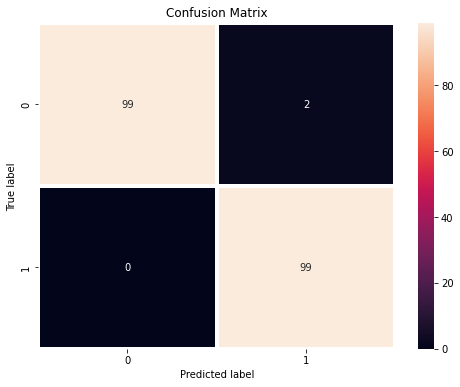

In [110]:
import seaborn as sns 
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, tf.round(y_pred)), annot = True, fmt = 'd', 
            linewidth = 3) 
plt.xlabel('Predicted label')
plt.ylabel('True label') 
plt.title('Confusion Matrix')
plt.show()

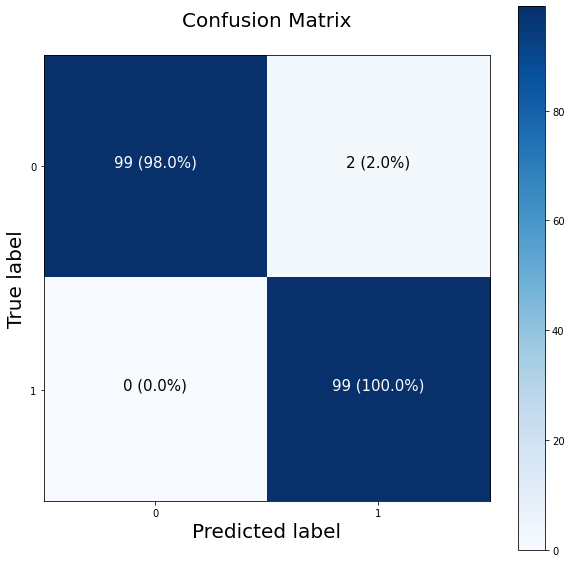

In [111]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a Larger example (multi class classification) 

When you have more than 2 classes as an option, it's known as a multi-class classification. 

To practice multi-class classification, we are going to build a neural network to classify images of different items of clothing

In [112]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist 

# the dataset has already been sorted into training and test sets for us 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [113]:
# show the first training example 
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

- an array of number between 0 and 255

In [114]:
# check the shape 
train_data[0].shape, train_labels[0].shape

((28, 28), ())

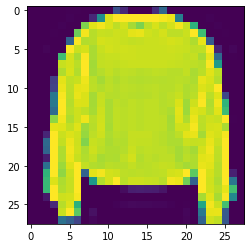

In [115]:
# plot a single sample 
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [116]:
train_labels[7]

2

In [117]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

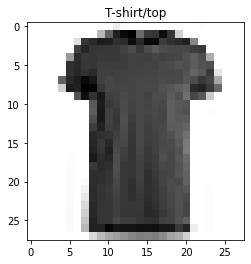

In [118]:
# plot an example image and it's label 
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

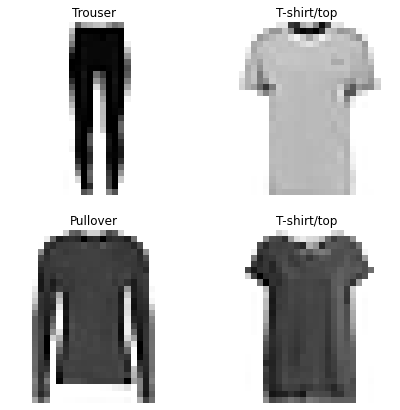

In [119]:
# plot multiple random fashion mnist images 
import random 
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

  # Build a Multi-class Classification 

  For our multi class model, we can use a similar architecture to our binary classifiers, however we have to tweak a few things 
  * Input shape = 28x28 (the shape of one image) 
  * Output shape  = 10 (one per class of clothing 
  * Loss function = tf.keras.losses.CategoricalCrossentropy() 
    * If your labels are OneHot encoded, use CategoricalCrossentropy() 
    * if your labels are integers, use SparseCategoricalCrossentropy()
  * Output layer activation = softmax (not sigmoid)

In [126]:
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # input data needs to be flattened
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# 2. compile the model 
model_9.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # Use CategoricalCrossentropy when the output is OneHot Encoder
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. fit the model 
history_9 = model_9.fit(train_data, train_labels, validation_data = (test_data, test_labels), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [127]:
# check model summary 
model_9.summary()



Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_69 (Dense)            (None, 4)                 3140      
                                                                 
 dense_70 (Dense)            (None, 4)                 20        
                                                                 
 dense_71 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [128]:
# check training data max and min values
train_data.max(), train_data.min()

(255, 0)

## Neural networks prefer data to be sclaed(normalized), i.e the numbers should be between 0 and 1

In [129]:
# divide through by the max number 
train_data_norm = train_data / 255 
test_data_norm = test_data / 255

In [130]:
# check normalized training data max and min values
train_data_norm.max(), train_data_norm.min()

(1.0, 0.0)

### Build a model with the scaled data

In [131]:
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # input data needs to be flattened
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# 2. compile the model 
model_10.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # Use CategoricalCrossentropy when the output is OneHot Encoder
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. fit the model 
history_10 = model_10.fit(train_data_norm, train_labels, validation_data = (test_data_norm, test_labels), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

✈ **Note:** Just by scaling the data, the model accuracy more than doubled

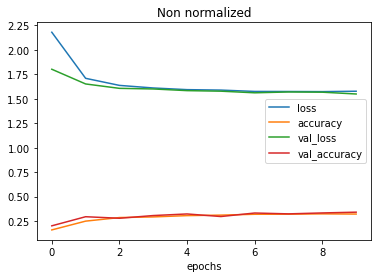

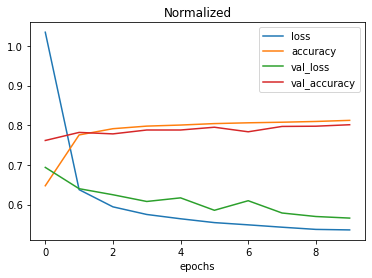

In [133]:
import pandas as pd 

# plot non_normalised data loss curves 
pd.DataFrame(history_9.history).plot(title = 'Non normalized', xlabel = 'epochs')
# plot non_normalised data loss curves 
pd.DataFrame(history_10.history).plot(title = 'Normalized', xlabel = 'epochs')

### Finding the ideal learning rate

In [135]:
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # input data needs to be flattened
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# 2. compile the model 
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # Use CategoricalCrossentropy when the output is OneHot Encoder
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy']) 

# 3. find the ideal learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 4. fit the model 
history_11 = model_11.fit(train_data_norm, train_labels, validation_data = (test_data_norm, test_labels), epochs = 40)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate ')

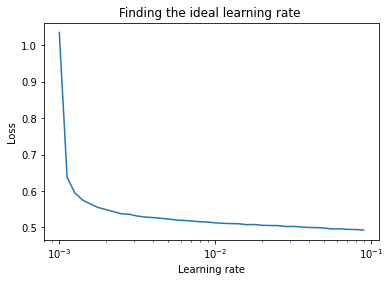

In [152]:
# plot lwearning rate decay curve 
import numpy as np 
import matplotlib.pyplot as plt 

lrs = 1e-3 * 10**(tf.range(40)/20) 
plt.semilogx(lrs, history_11.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate ')

- The ideal learning rate is $10^-3$

In [153]:
1e-3

0.001

### Build a model with the ideal learning rate which is 1

In [154]:
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# 2. compile the model 
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # Use CategoricalCrossentropy when the output is OneHot Encoder
                optimizer = tf.keras.optimizers.Adam(0.001), 
                metrics = ['accuracy']) 

# 3. fit the model 
history_12 = model_12.fit(train_data_norm, train_labels, validation_data = (test_data_norm, test_labels), epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

### Evaluate our model

In [161]:
from sklearn.metrics import confusion_matrix 

# predict unseen data 
y_probs = model_12.predict(test_data_norm)
y_probs

313/313 [==============================] - 0s 2ms/step


array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, ..., 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, ..., 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, ..., 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14],
       ...,
       [7.8579471e-02, 2.2294847e-05, 1.4033382e-01, ..., 2.9534183e-20,
        1.1197245e-01, 4.7600044e-09],
       [3.3110868e-05, 9.9301320e-01, 2.3392292e-07, ..., 9.3986522e-15,
        8.1592469e-07, 1.2158882e-11],
       [7.9816104e-08, 7.7579027e-10, 1.6470609e-04, ..., 4.3826353e-02,
        1.5162523e-03, 3.9120510e-02]], dtype=float32)

- predict probabilities of the class instead of the actual class

In [162]:
y_probs[0]

array([8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
       5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
       4.0605105e-03, 8.0787414e-01], dtype=float32)

In [163]:
# finding the class with the highest probabilities
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [164]:
# convert all of the prediction probabilites into integers 
y_preds = y_probs.argmax(axis = 1)

# view first 10 prediction labels 
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [165]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [167]:
# create confusion matrix 
confusion_matrix(test_labels, y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

### Prettify the confusion matrix

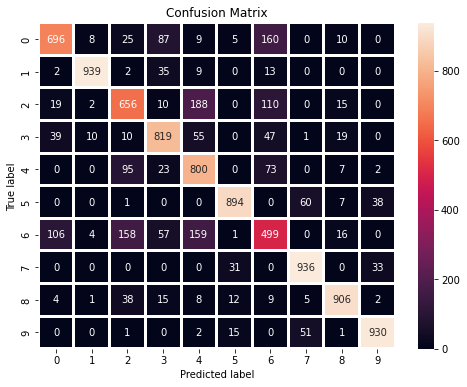

In [169]:
import seaborn as sns 
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(test_labels, y_preds), annot = True, fmt = 'd', 
            linewidth = 2) 
plt.xlabel('Predicted label')
plt.ylabel('True label') 
plt.title('Confusion Matrix')
plt.show()

### Visualize the data 
* Plot a random image 
* Make a prediction on said image 
* Label the plot with the truth label and the predicted label

In [174]:
import random 

def plot_random_image(model, images, true_labels, classes): 
  '''
  picks a random image, plots it and labels it with a prediction and truth label
  ''' 
  # set up random integer 
  i = random.randint(0, len(images)) 

  # create predictions and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image 
  plt.imshow(target_image, cmap = plt.cm.binary)

  # change the color of the titles depending on if the prediction is right or worng 
  if pred_label == true_label:
    color = 'green'
  else: 
    color = 'red'

  # add xlabel information (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label), 
             color = color)

1/1 [==============================] - 0s 165ms/step


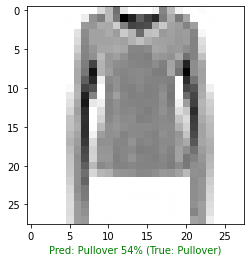

In [175]:
# check out a random image as well as it's prediction 
plot_random_image(model_12, test_data_norm, 
                  test_labels, class_names)

What patterns is our model Learning

In [176]:
# find the layers of our most recent model 
model_12.layers

In [177]:
# extract a particular layer 
model_12.layers[1]

In [178]:
# get the patterns of a layer 
weights, biases = model_12.layers[1].get_weights()

In [180]:
weights, weights.shape

(array([[ 0.715027  , -0.06077112, -0.9976308 , -1.0484312 ],
        [ 0.27732143, -0.4715541 , -0.5291646 ,  0.02329262],
        [ 0.7752432 ,  0.5402756 , -1.128857  , -0.7426152 ],
        ...,
        [-0.39453375,  0.47628623, -0.22641547,  0.25505966],
        [-0.40515727,  0.6181007 ,  0.23928417, -0.503876  ],
        [ 0.23884544,  0.11606897, -0.1213136 ,  0.04352434]],
       dtype=float32), (784, 4))

In [181]:
model_12.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_90 (Dense)            (None, 4)                 3140      
                                                                 
 dense_91 (Dense)            (None, 4)                 20        
                                                                 
 dense_92 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [183]:
# biases 
biases, biases.shape

(array([ 2.4485679e-02, -6.1455613e-04, -2.7230152e-01,  8.1124908e-01],
       dtype=float32), (4,))

# Saved Model for future reuse

In [184]:
# save .h5 model format
model_12.save('FashionMNISTModel.h5')